# CMSC 197 Problem Set 3

## Implementing Linear Regression with Gradient Descent as Optimization Function

by: Dleamnor Euraze Cawaling

In [1]:
### Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### For Preprocessing ###
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

### For Building the Model ###
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

### For Validation of the Model ###
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

 ### Load Advertising.csv dataset using pandas

In [2]:
### Load the data
data = pd.read_csv("Advertising.csv", index_col = 0)
print("Size of the data:", data.shape)
data.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Standardize each column of the dataset 

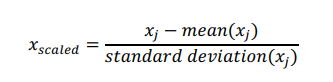

In [3]:
# computing for standardized values
x_scaled = (data - np.mean(data))/np.std(data)
x_scaled

### Alternatively we can use StandardScaler to standardize the predictors
# separate the independent/predictor from the response/target variable
# predictor = ['TV','Radio','Newspaper']

# data[predictor] = StandardScaler().fit_transform(data[predictor])
# data

,TV,Radio,Newspaper,Sales
1,0.969852,0.981522,1.778945,1.552053
2,-1.197376,1.082808,0.669579,-0.696046
3,-1.516155,1.528463,1.783549,-0.907406
4,0.052050,1.217855,1.286405,0.860330
5,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
196,-1.270941,-1.321031,-0.771217,-1.234053
197,-0.617035,-1.240003,-1.033598,-0.830548
198,0.349810,-0.942899,-1.111852,-0.234898
199,1.594565,1.265121,1.640850,2.205347


### Add an extra column composing of all ones to data

In [4]:
# add extra column composing of all ones 
x_scaled.insert(0, 'bias', [1]*len(data))

# drop the Sales to get only the X variables/independent variables
x = x_scaled.drop("Sales", axis = 1)
y = x_scaled["Sales"]
x

,bias,TV,Radio,Newspaper
1,1,0.969852,0.981522,1.778945
2,1,-1.197376,1.082808,0.669579
3,1,-1.516155,1.528463,1.783549
4,1,0.052050,1.217855,1.286405
5,1,0.394182,-0.841614,1.281802
...,...,...,...,...
196,1,-1.270941,-1.321031,-0.771217
197,1,-0.617035,-1.240003,-1.033598
198,1,0.349810,-0.942899,-1.111852
199,1,1.594565,1.265121,1.640850


### Divide the dataset into training and testing, with 0.85 and 0.25 ratio, respectively.

P.S. I am assuming that the given ratio is incorrectly written since it is not equal to 1 when combined. Hence, I choose the testing size to be 0.25, and just changed the training size to be 0.75 to have a correct ratio.  

In [5]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 4)
y_train size: (150,)

x_test size: (50, 4)
y_test size: (50,)


### Fit the model on the training set.

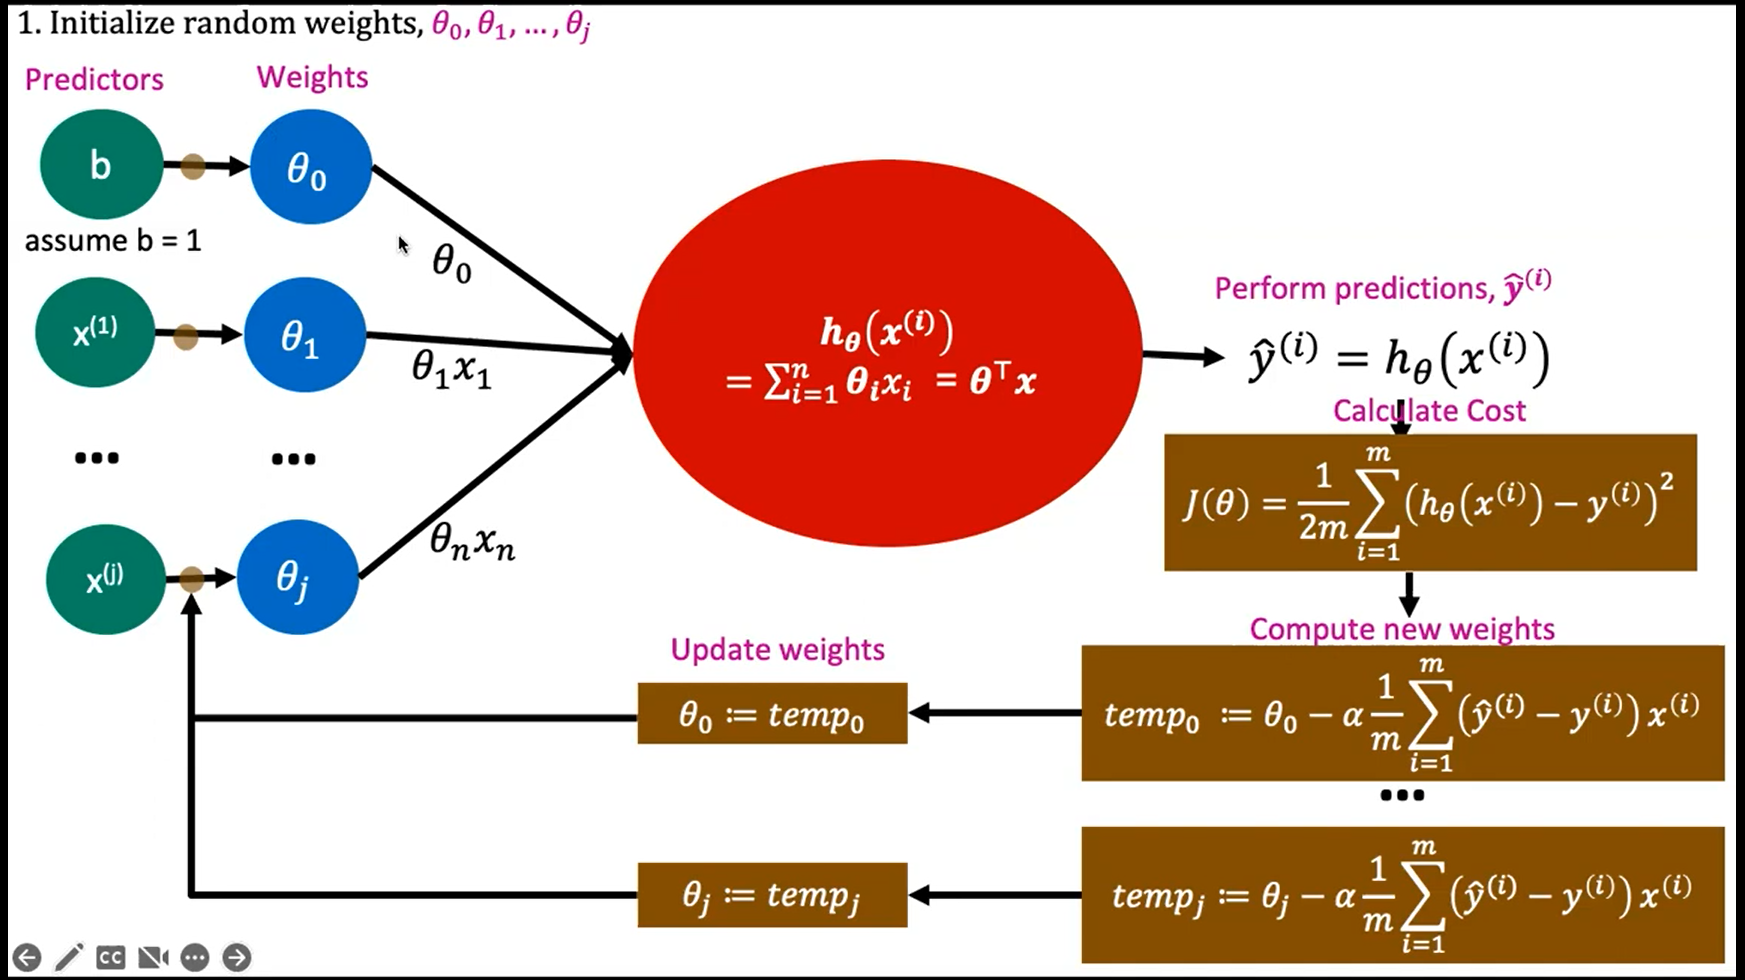

#### 1. initialize_weights

In [6]:
def initialize_weights():
    # the first weight refers to the weight of the bias and the rest represents that of the predictors.
    init_w = np.array([0.0, 0.0, 0.0, 0.0])
    
    return init_w
initialize_weights()

array([0., 0., 0., 0.])

#### 2. predict: returns a vector of the predicted values y_hat

In [7]:
# w = theta
def predict(x,w):
    y_hat = np.dot(x,w)
    return y_hat
predict(x_train,initialize_weights())

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### 3. compute_cost: returns a scalar value that tells us how accurate the model is. This is represented by 

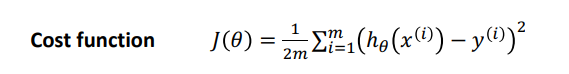

In [8]:
def compute_cost(y_hat, y):
    m = y.shape[0]
    MSE = np.sum(np.square(y_hat - y))/(2*m)
    return MSE
compute_cost(predict(x_train,initialize_weights()),y_train)

0.4958314940739506

#### 4. compute_gradient: returns a matrix w that represents the partial derivative of the cost function with respect to each parameter. 

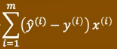

In [9]:
def compute_gradient(y_hat,y,x):
    w = np.dot((y_hat-y),x)
    return w
compute_gradient(predict(x_train,initialize_weights()),y_train, x_train)

array([  -8.13254704, -114.09134774,  -87.77416905,  -32.88588193])

#### 5. update_weights: returns a 4x1 matrix that contains the updated weights. 

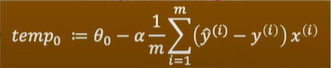

In [10]:
def update_weights(w, lr, gradients, m):
    w = w - (lr * gradients) / m
    return w

#### 6. grad_descent

In [11]:
def grad_descent(w, x, y, iterations, lr):
    m = y.size
    costs = []
    for _ in range(iterations):
        y_hat = predict(x,w)
        cost = compute_cost(y_hat,y)
        costs.append(cost)
        gradients = compute_gradient(y_hat,y,x)
        w = update_weights(w, lr, gradients, m)
    return w, costs

In [12]:
#optimal = 1000, 0.8
w, costs = grad_descent(initialize_weights(), x_train, y_train, 1000, 0.8)
w

array([-0.00596077,  0.74761782,  0.54480926,  0.01071968])

#### 7. plot_costs: plot the costs as a function of iteration

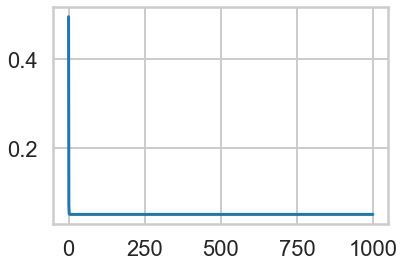

In [13]:
# plot_costs
plt.plot(costs)

#### 8. Predict y for train set and calculate the cost

In [14]:
# Predict y for train set and calculate the cost
train_pred = predict(x_train, w)
cost = compute_cost(y_train,train_pred)
cost

0.05109498014148077

#### 9. Predict y for test set and calculate the cost

In [15]:
# Predict y for test set and calculate the cost
test_pred = predict(x_test, w)
cost = compute_cost(y_test,test_pred)
cost

0.05316493718386803

### Predict the quantitative response y on the train set. Evaluate performance. 
You can use the MSE cost function defined for the gradient descent.

In [16]:
# predict the quantitative response y on the train set
train_pred = predict(x_train,w)
# evaluate performance
R2 = r2_score(y_train,train_pred)*100
R2

89.66445527601498

There is 89.66% prediction accuracy for the train set. 

### Predict the quantitative response y on the test set. Evaluate performance. 
Similarly, you can use the MSE cost function defined for the gradient descent.

In [17]:
# predict the quantitative response y on the test set
test_pred = predict(x_test,w)
# evaluate performance
R2 = r2_score(y_test,test_pred)*100
R2

89.35163320163659

There is 89.35% prediction accuracy for the test set. 

### Revert back a standardized data into the original form.
Note: Since the data is standardized, you might be surprised that the predictions differ from the original data. In order to revert back a standardized data into the original form, we simply have to equate the previous equation:

In [18]:
X = x_scaled * np.std(data) + np.mean(data) 
X

,Newspaper,Radio,Sales,TV,bias
1,69.2,37.8,22.1,230.1,NaN
2,45.1,39.3,10.4,44.5,NaN
3,69.3,45.9,9.3,17.2,NaN
4,58.5,41.3,18.5,151.5,NaN
5,58.4,10.8,12.9,180.8,NaN
...,...,...,...,...,...
196,13.8,3.7,7.6,38.2,NaN
197,8.1,4.9,9.7,94.2,NaN
198,6.4,9.3,12.8,177.0,NaN
199,66.2,42.0,25.5,283.6,NaN


### Observation and analysis of the cost results

The cost of predicting y for train set and test set is around 0.05. This is a very low cost meaning that the model has a low error rate. Also, as we evaluate the performance of the prediction model, we have seen that the accuracy is at around 89% for both the test and train set. 

## Questions

1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:

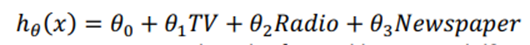

In [19]:
# finding the optimal weights
# optimal = 1000, 0.8
w, costs = grad_descent(initialize_weights(), x_train, y_train, 1000, 0.8)
w

array([-0.00596077,  0.74761782,  0.54480926,  0.01071968])

In [20]:
# plugging the optimal weights into the linear model
y_hat = w[0] + w[1] * x_scaled['TV'] + w[2] * x_scaled['Radio'] + w[3] * x_scaled['Newspaper']
y_hat

1      1.272930
2     -0.304039
3     -0.287625
4      0.710241
5     -0.156042
         ...   
196   -1.684116
197   -1.153912
198   -0.270055
199    1.893004
200    0.186343
Length: 200, dtype: float64

2. Provide a scatter plot of the y_hat and y for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn).

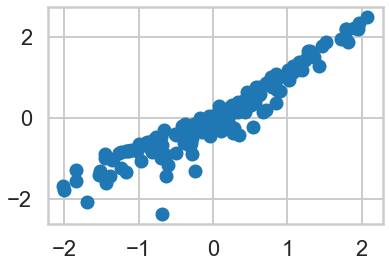

In [21]:
plt.scatter(train_pred,y_train)

In [22]:
# evaluate performance
R2 = r2_score(y_train,train_pred)*100
R2

89.66445527601498

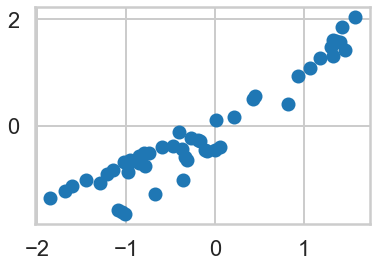

In [23]:
plt.scatter(test_pred,y_test)

In [24]:
# evaluate performance
R2 = r2_score(y_test,test_pred)*100
R2

89.35163320163659

3. What happens to the error, r2, and cost as the number of iterations increases? Show your data and proof. You can alternatively plot your result data and check until 5000 iterations or more (actually).

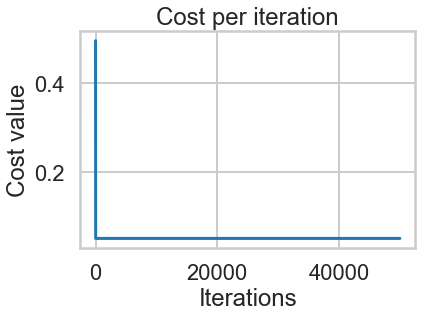

In [25]:
iterations = 50000
learning_rate = 0.8

# perform gradient descent and get the costs and weights for each iterations
w, costs = grad_descent(initialize_weights(), x_train, y_train, iterations, learning_rate)

plt.plot(costs)
plt.title('Cost per iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost value')
plt.show()

4.	Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.

In [26]:
# checking the effect on cost and error as learning rate is changed
w, cost1 = grad_descent(initialize_weights(), x_train, y_train, 2500, 0.1)
w, cost2 = grad_descent(initialize_weights(), x_train, y_train, 2500, 0.001)
w, cost3 = grad_descent(initialize_weights(), x_train, y_train, 2500, 0.0001)
w, cost4 = grad_descent(initialize_weights(), x_train, y_train, 2500, 0.2)

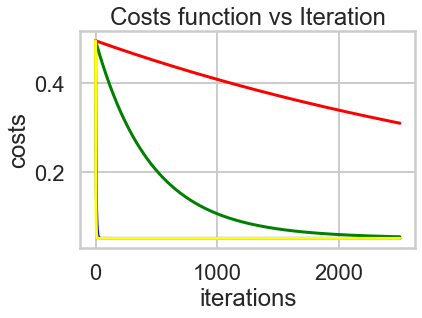

In [27]:
fig, ax = plt.subplots()
plt.title("Costs function vs Iteration")
plt.xlabel("iterations")
plt.ylabel("costs")
ax.plot(cost1, color='blue')
ax.plot(cost2, color='green')
ax.plot(cost3, color='red')
ax.plot(cost4, color='yellow')
plt.show()